In [1]:
from ScalableVolumetricBenchmark import *

#braket for tests
from braket.circuits import Circuit, noises, Gate
from braket.devices import LocalSimulator
from braket.circuits.measure import Measure
from braket.aws import AwsDevice,  AwsSession, AwsQuantumTask
import boto3

# import python modules for visualization
import matplotlib.pyplot as plt
import numpy as np
from rustworkx.visualization import mpl_draw

 # Clifford Volume Benchmark with Braket

In [2]:
n_qubits = 3
sample_size = 1
shots = 2048

benchmark = CliffordVolumeBenchmark(
    number_of_qubits=n_qubits,
    sample_size=sample_size,
    format="qasm3",
    target_sdk="braket",
    shots=shots,
    auto_save=False,
)
benchmark.create_benchmark()
benchmark

CliffordVolumeBenchmark(
  benchmark_id='clifford_nq3_s1_20260126T104218_fe262025',
  number_of_qubits=3,
  sample_size=1,
  format='qasm3',
  target_sdk='braket',
  workdir=WindowsPath('.benchmarks'),
)

In [3]:
benchmark_circuits = benchmark.get_all_circuits()


braket_benchmark_circuits = [Circuit.from_ir(circuit) for circuit in benchmark_circuits] #load qasm code to braket


print(benchmark_circuits[0], "\n")
print(braket_benchmark_circuits[0], "\n \n \n ")

OPENQASM 3.0;


qubit[3] q;
bit[3] c;

cnot q[1], q[0];
cnot q[0], q[1];
cnot q[1], q[0];
s q[0];
h q[0];
s q[1];
cnot q[0], q[1];
s q[2];
h q[1];
h q[2];
cnot q[1], q[0];
cnot q[2], q[0];
cnot q[2], q[1];
cnot q[1], q[2];
cnot q[2], q[1];
s q[1];
s q[2];
cnot q[1], q[2];
h q[2];
s q[2];
s q[1];
s q[1];
si q[0];
h q[0];

c[0] = measure q[0];
c[1] = measure q[1];
c[2] = measure q[2]; 

T  : │  0  │  1  │  2  │  3  │  4  │  5  │  6  │  7  │  8  │  9   │ 10  │ 11  │ 12  │ 13  │ 14  │ 15  │ 16  │
      ┌───┐       ┌───┐ ┌───┐ ┌───┐             ┌───┐ ┌───┐ ┌────┐ ┌───┐                               ┌───┐ 
q0 : ─┤ X ├───●───┤ X ├─┤ S ├─┤ H ├───●─────────┤ X ├─┤ X ├─┤ Si ├─┤ H ├───────────────────────────────┤ M ├─
      └─┬─┘   │   └─┬─┘ └───┘ └───┘   │         └─┬─┘ └─┬─┘ └────┘ └───┘                               └───┘ 
        │   ┌─┴─┐   │   ┌───┐       ┌─┴─┐ ┌───┐   │     │   ┌───┐        ┌───┐ ┌───┐       ┌───┐ ┌───┐ ┌───┐ 
q1 : ───●───┤ X ├───●───┤ S ├───────┤ X ├─┤ H ├───●─────┼───┤ 

## Running and Evaluating the Circuits

Once circuits are prepared, we simulate them on a virtual (ideal) backend and retrieve measurement counts.

In [4]:
device = LocalSimulator("braket_dm")
task = device.run_batch(braket_benchmark_circuits, shots=benchmark.shots)
results = task.results()

counts = [result.measurement_counts for result in results]

Add experimental results to the benchmark instance and evaulate the becnhmark.

In [5]:
benchmark.add_experimental_results(counts)

In [6]:
_ = benchmark.evaluate_benchmark()


 Clifford Benchmark Evaluation (3 qubits)
Thresholds: τ_S = 1/e = 0.367879   τ_D = 1/(2e) = 0.183940
Shots per circuit: 2048
--------------------------------------------------------------
Stabilizers (all measured):
  • mean ± std: 1.000000 ± 0.000000
  • min EV:     1.000000
Destabilizers (all measured):
  • mean ± std: -0.008789 ± 0.024434
  • max |EV|:   0.030273
--------------------------------------------------------------
Per-sample pass count: 1/1
Worst stabilizer margin (min over samples of <S>-2σ): sample 0 -> 1.000000
Worst destabilizer margin (max over samples of |<D>|+2σ): sample 0 -> 0.074447
Benchmark passed (all samples): True



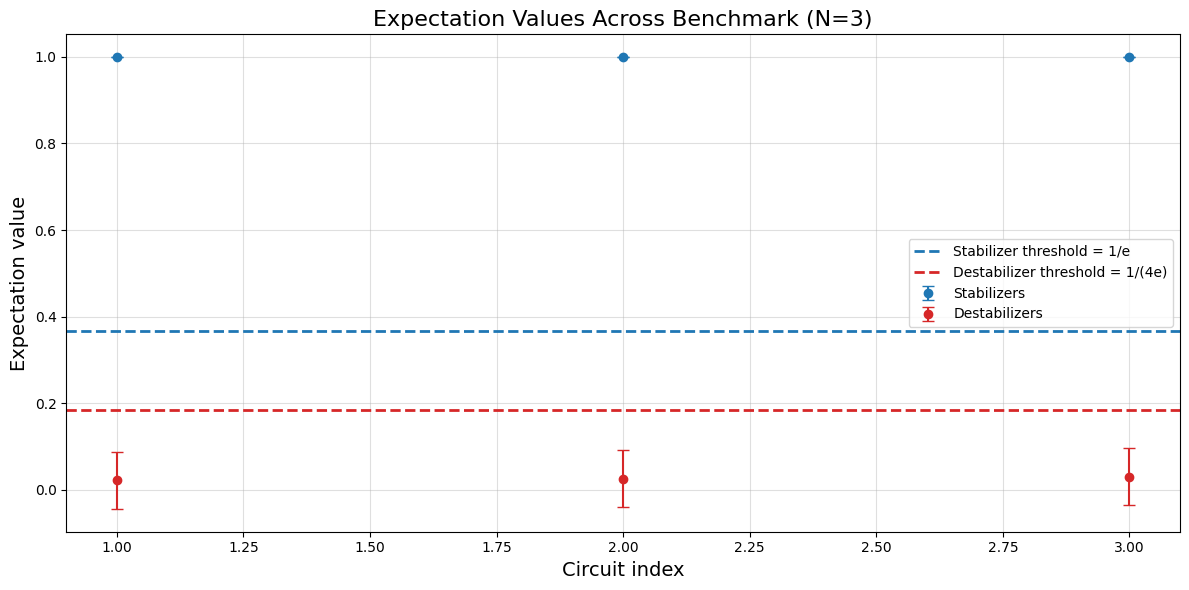

In [7]:
benchmark.plot_all_expectation_values()